In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split 
import math
from pmdarima.arima import auto_arima
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings
warnings.filterwarnings("ignore")

In [2]:
sales_df = pd.read_csv('train.csv',encoding= 'unicode_escape')

## Retail dataset of a global superstore for 4 years.

### Dataframe Exploration

In [3]:
sales_df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category Sub-Category  \
0      42420.0  South  FUR-BO-10001798        Furniture    Bookcases   
1      42420.0  South  FUR-CH-10000454        Furniture       Chairs   
2      90036.0   West  OFF-LA-10000240  Office Supplies       Labels   
3      33311.0  South  FUR-TA-10000577        Furniture       Tables   
4      33311.0  South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  
0                  Bush Somerset Collection Bookcase  261.9600  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4                     Eldon Fold 'N Roll Cart System   22.3680

In [4]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [5]:
sales_df.tail()

Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country     City  \
9795    SH-19975     Sally Hughsby  Corporate  United States  Chicago   
9796    CS-12490  Cindy Schnelling  Corporate  United States   Toledo   
9797    CS-12490  Cindy Schnelling  Corporate  United States   Toledo   
9798    CS-12490  Cindy Schnelling  Corporate  United States   Toledo   
9799    CS-12490  Cindy Schnelling  Corporate  United States   Toledo   

         State  Postal Code   Region       Product ID         Category  \
9795  Illinois      60610.0  Central  OFF-BI-10003429  Office Supplies   
9796      Ohio      43615.0     East  OFF-AR-10001374  Office Supplies   
9797      Ohio      43615.0     East  TEC-PH-10004977       Technology   
9798      Ohio      43615.0     East  TEC-PH-10000912       Technology   
9799      Ohio      43615.0     East  TEC-AC-10000487       Technology   

     Sub-Category                                       Product Name    Sales  
9795      Binders  Cardinal HOLDit! Binder Insert Strips,Extra St...    3.798  
9796          Art           BIC Brite Liner Highlighters, Chisel Tip   10.368  
9797       Phones                                        GE 30524EE4  235.188  
9798       Phones           Anker 24W Portable Micro USB Car Charger   26.376  
9799  Accessories                SanDisk Cruzer 4 GB USB Flash Drive   10.384

In [6]:
sales_df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [7]:
sales_df.values

array([[1, 'CA-2017-152156', '08/11/2017', ..., 'Bookcases',
        'Bush Somerset Collection Bookcase', 261.96],
       [2, 'CA-2017-152156', '08/11/2017', ..., 'Chairs',
        'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back',
        731.94],
       [3, 'CA-2017-138688', '12/06/2017', ..., 'Labels',
        'Self-Adhesive Address Labels for Typewriters by Universal',
        14.62],
       ...,
       [9798, 'CA-2016-128608', '12/01/2016', ..., 'Phones',
        'GE 30524EE4', 235.188],
       [9799, 'CA-2016-128608', '12/01/2016', ..., 'Phones',
        'Anker 24W Portable Micro USB Car Charger', 26.376],
       [9800, 'CA-2016-128608', '12/01/2016', ..., 'Accessories',
        'SanDisk Cruzer 4 GB USB Flash Drive', 10.384]], dtype=object)

In [8]:
sales_df.index

RangeIndex(start=0, stop=9800, step=1)

In [9]:
sales_df.describe()

Row ID   Postal Code         Sales
count  9800.000000   9789.000000   9800.000000
mean   4900.500000  55273.322403    230.769059
std    2829.160653  32041.223413    626.651875
min       1.000000   1040.000000      0.444000
25%    2450.750000  23223.000000     17.248000
50%    4900.500000  58103.000000     54.490000
75%    7350.250000  90008.000000    210.605000
max    9800.000000  99301.000000  22638.480000

In [10]:
sales_df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

### EDA

In [11]:
sales_df.columns = sales_df.columns.str.lower()

In [12]:
sales_df.head()

row id        order id  order date   ship date       ship mode customer id  \
0       1  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156  08/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688  12/06/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     customer name    segment        country             city       state  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   postal code region       product id         category sub-category  \
0      42420.0  South  FUR-BO-10001798        Furniture    Bookcases   
1      42420.0  South  FUR-CH-10000454        Furniture       Chairs   
2      90036.0   West  OFF-LA-10000240  Office Supplies       Labels   
3      33311.0  South  FUR-TA-10000577        Furniture       Tables   
4      33311.0  South  OFF-ST-10000760  Office Supplies      Storage   

                                        product name     sales  
0                  Bush Somerset Collection Bookcase  261.9600  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400  
2  Self-Adhesive Address Labels for Typewriters b...   14.6200  
3      Bretford CR4500 Series Slim Rectangular Table  957.5775  
4                     Eldon Fold 'N Roll Cart System   22.3680

In [13]:
sales_df['country'].value_counts()

United States    9800
Name: country, dtype: int64

In [14]:
sales_df['country'] = sales_df.drop('country',axis=1,inplace=True)

In [15]:
sales_df.dtypes

row id             int64
order id          object
order date        object
ship date         object
ship mode         object
customer id       object
customer name     object
segment           object
city              object
state             object
postal code      float64
region            object
product id        object
category          object
sub-category      object
product name      object
sales            float64
country           object
dtype: object

In [16]:
sales_df.columns = sales_df.columns.str.replace(' ','_')

In [17]:
sales_df['order_date'] = pd.to_datetime(sales_df['order_date'])
sales_df['ship_date'] = pd.to_datetime(sales_df['ship_date'])

In [18]:
sales_df.isnull().sum()

row_id              0
order_id            0
order_date          0
ship_date           0
ship_mode           0
customer_id         0
customer_name       0
segment             0
city                0
state               0
postal_code        11
region              0
product_id          0
category            0
sub-category        0
product_name        0
sales               0
country          9800
dtype: int64

In [19]:
#sales_df.dropna(inplace=True)

In [20]:
sales_df.dtypes

row_id                    int64
order_id                 object
order_date       datetime64[ns]
ship_date        datetime64[ns]
ship_mode                object
customer_id              object
customer_name            object
segment                  object
city                     object
state                    object
postal_code             float64
region                   object
product_id               object
category                 object
sub-category             object
product_name             object
sales                   float64
country                  object
dtype: object

In [21]:
sales_df.head()

row_id        order_id order_date  ship_date       ship_mode customer_id  \
0       1  CA-2017-152156 2017-08-11 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156 2017-08-11 2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688 2017-12-06 2017-06-16    Second Class    DV-13045   
3       4  US-2016-108966 2016-11-10 2016-10-18  Standard Class    SO-20335   
4       5  US-2016-108966 2016-11-10 2016-10-18  Standard Class    SO-20335   

     customer_name    segment             city       state  postal_code  \
0      Claire Gute   Consumer        Henderson    Kentucky      42420.0   
1      Claire Gute   Consumer        Henderson    Kentucky      42420.0   
2  Darrin Van Huff  Corporate      Los Angeles  California      90036.0   
3   Sean O'Donnell   Consumer  Fort Lauderdale     Florida      33311.0   
4   Sean O'Donnell   Consumer  Fort Lauderdale     Florida      33311.0   

  region       product_id         category sub-category  \
0  South  FUR-BO-10001798        Furniture    Bookcases   
1  South  FUR-CH-10000454        Furniture       Chairs   
2   West  OFF-LA-10000240  Office Supplies       Labels   
3  South  FUR-TA-10000577        Furniture       Tables   
4  South  OFF-ST-10000760  Office Supplies      Storage   

                                        product_name     sales country  
0                  Bush Somerset Collection Bookcase  261.9600    None  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400    None  
2  Self-Adhesive Address Labels for Typewriters b...   14.6200    None  
3      Bretford CR4500 Series Slim Rectangular Table  957.5775    None  
4                     Eldon Fold 'N Roll Cart System   22.3680    None

In [22]:
sales_df.state.unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

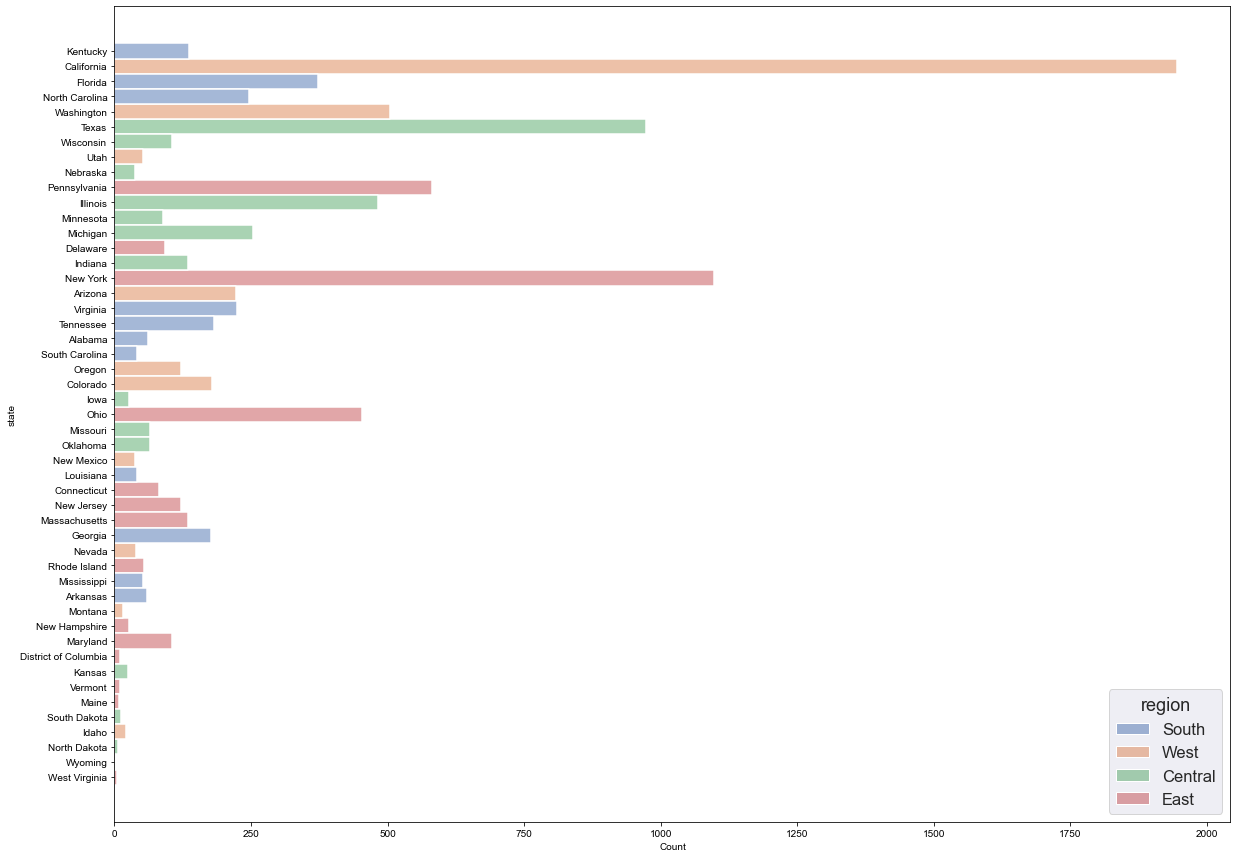

In [23]:
plt.figure(figsize=(20,15))
plt.locator_params(axis='x',nbins=10);
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
sns.histplot(y='state',data=sales_df,hue='region');

In [24]:
item_counts = sales_df["state"].value_counts() #normalize=True shows percentages
print(item_counts)

California              1946
New York                1097
Texas                    973
Pennsylvania             582
Washington               504
Illinois                 483
Ohio                     454
Florida                  373
Michigan                 253
North Carolina           247
Virginia                 224
Arizona                  223
Tennessee                183
Colorado                 179
Georgia                  177
Kentucky                 137
Indiana                  135
Massachusetts            135
Oregon                   122
New Jersey               122
Maryland                 105
Wisconsin                105
Delaware                  93
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              55
Utah                      53
Mississippi               53
South Carolina            42
Louisiana                 41
Nevada        

In [25]:
sales_df.head()

row_id        order_id order_date  ship_date       ship_mode customer_id  \
0       1  CA-2017-152156 2017-08-11 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156 2017-08-11 2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688 2017-12-06 2017-06-16    Second Class    DV-13045   
3       4  US-2016-108966 2016-11-10 2016-10-18  Standard Class    SO-20335   
4       5  US-2016-108966 2016-11-10 2016-10-18  Standard Class    SO-20335   

     customer_name    segment             city       state  postal_code  \
0      Claire Gute   Consumer        Henderson    Kentucky      42420.0   
1      Claire Gute   Consumer        Henderson    Kentucky      42420.0   
2  Darrin Van Huff  Corporate      Los Angeles  California      90036.0   
3   Sean O'Donnell   Consumer  Fort Lauderdale     Florida      33311.0   
4   Sean O'Donnell   Consumer  Fort Lauderdale     Florida      33311.0   

  region       product_id         category sub-category  \
0  South  FUR-BO-10001798        Furniture    Bookcases   
1  South  FUR-CH-10000454        Furniture       Chairs   
2   West  OFF-LA-10000240  Office Supplies       Labels   
3  South  FUR-TA-10000577        Furniture       Tables   
4  South  OFF-ST-10000760  Office Supplies      Storage   

                                        product_name     sales country  
0                  Bush Somerset Collection Bookcase  261.9600    None  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400    None  
2  Self-Adhesive Address Labels for Typewriters b...   14.6200    None  
3      Bretford CR4500 Series Slim Rectangular Table  957.5775    None  
4                     Eldon Fold 'N Roll Cart System   22.3680    None

In [26]:
sales_df.category.value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: category, dtype: int64

In [27]:
sales_df['sub-category'].value_counts()

Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: sub-category, dtype: int64

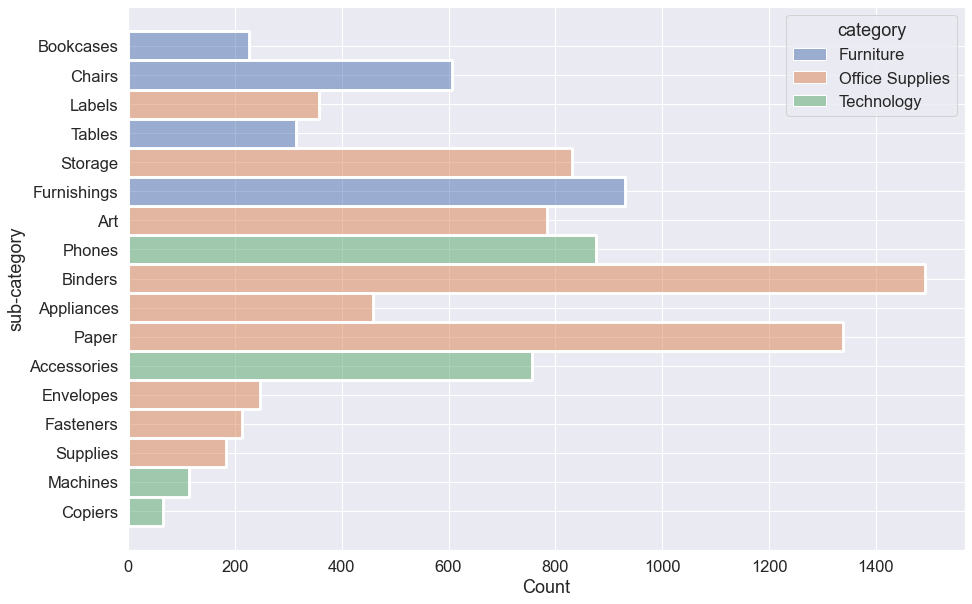

In [28]:
plt.figure(figsize=(15,10))
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
sns.histplot(y='sub-category',data=sales_df,hue='category');

In [29]:
#sales_df['product_name'] = pd.DataFrame

In [30]:
sales_df.head()

row_id        order_id order_date  ship_date       ship_mode customer_id  \
0       1  CA-2017-152156 2017-08-11 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156 2017-08-11 2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688 2017-12-06 2017-06-16    Second Class    DV-13045   
3       4  US-2016-108966 2016-11-10 2016-10-18  Standard Class    SO-20335   
4       5  US-2016-108966 2016-11-10 2016-10-18  Standard Class    SO-20335   

     customer_name    segment             city       state  postal_code  \
0      Claire Gute   Consumer        Henderson    Kentucky      42420.0   
1      Claire Gute   Consumer        Henderson    Kentucky      42420.0   
2  Darrin Van Huff  Corporate      Los Angeles  California      90036.0   
3   Sean O'Donnell   Consumer  Fort Lauderdale     Florida      33311.0   
4   Sean O'Donnell   Consumer  Fort Lauderdale     Florida      33311.0   

  region       product_id         category sub-category  \
0  South  FUR-BO-10001798        Furniture    Bookcases   
1  South  FUR-CH-10000454        Furniture       Chairs   
2   West  OFF-LA-10000240  Office Supplies       Labels   
3  South  FUR-TA-10000577        Furniture       Tables   
4  South  OFF-ST-10000760  Office Supplies      Storage   

                                        product_name     sales country  
0                  Bush Somerset Collection Bookcase  261.9600    None  
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400    None  
2  Self-Adhesive Address Labels for Typewriters b...   14.6200    None  
3      Bretford CR4500 Series Slim Rectangular Table  957.5775    None  
4                     Eldon Fold 'N Roll Cart System   22.3680    None

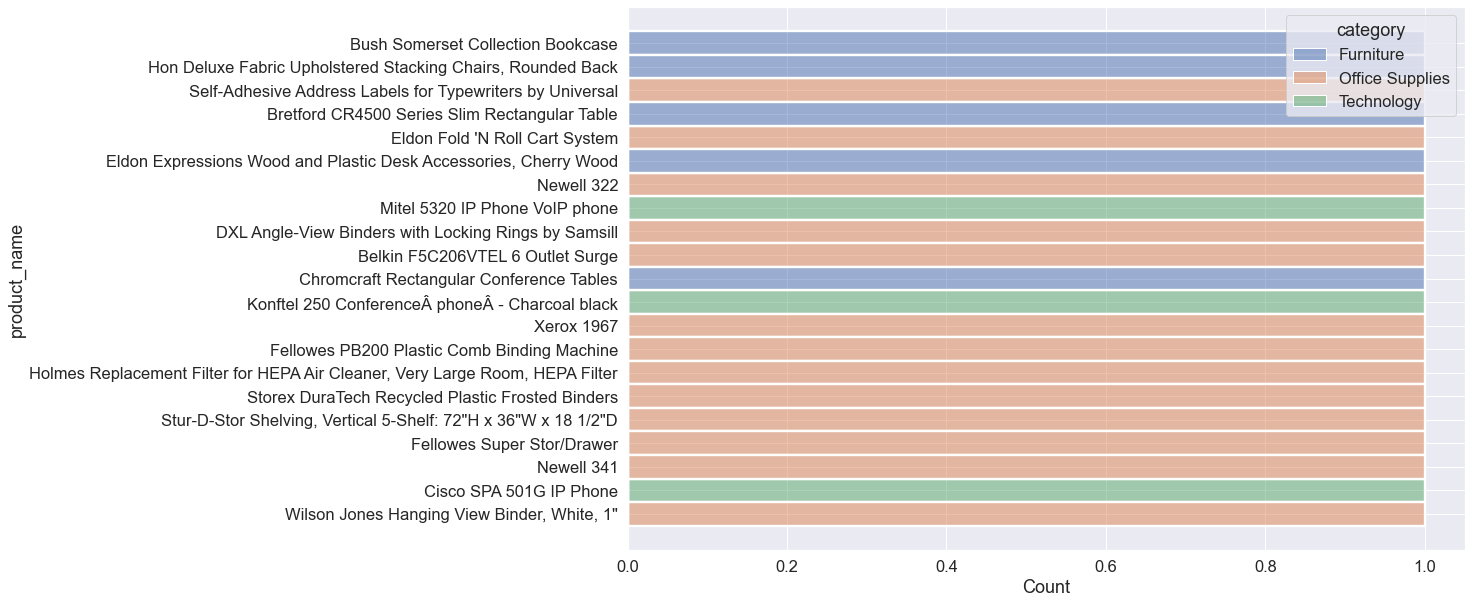

In [31]:
plt.figure(figsize=(15,10))
sns.histplot(y='product_name',data=sales_df.loc[0:20],hue='category');

In [32]:
n = 10
largest_ten = sales_df['product_name'].value_counts().index.tolist()

In [33]:
#sns.histplot(y=largest_ten,data=largest_ten);

In [34]:
sales_df.city.value_counts()

New York City    891
Los Angeles      728
Philadelphia     532
San Francisco    500
Seattle          426
                ... 
Palatine           1
Portage            1
Saint Peters       1
Margate            1
San Mateo          1
Name: city, Length: 529, dtype: int64

In [35]:
#plt.figure(figsize=(10,100))
#sns.histplot(y='city',data=sales_df,hue='state',);

In [36]:
state = ['Alabama', 'Arizona' ,'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 
         'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
         'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana','Nebraska', 'Nevada', 'New Hampshire',
         'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
         'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
         'West Virginia', 'Wisconsin','Wyoming']
state_code = ['AL','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA',
              'MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN',
              'TX','UT','VT','VA','WA','WV','WI','WY']

In [37]:
state_df = pd.DataFrame(state, state_code) # Create a dataframe
state_df.reset_index(level=0, inplace=True)
state_df.columns = ['State Code','State']
sales = sales_df.groupby(["state"]).sum().sort_values("sales", ascending=False)
sales.reset_index(level=0, inplace=True)
sales.drop('postal_code',1, inplace = True)
sales= sales.sort_values('state', ascending=True)
sales.reset_index(inplace = True)
sales.drop('index',1,inplace = True)
sales.insert(1, 'State Code', state_df['State Code'])

In [38]:
import plotly.graph_objects as go

sales_df['text'] = sales_df['state']
fig = go.Figure(data=go.Choropleth(
    locations=sales_df['postal_code'], # Spatial coordinates
    text=sales_df['text'],
    z = sales_df['sales'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Sales",
    
))

fig.update_layout(
    title_text = 'Sales',
    geo_scope='usa', # limite map scope to USA
)

fig.show();

## Data Preprocessing 

Set the order date feature to the index

In [39]:
sales_df.index = sales_df.order_date

Group the duplicate index values together and combine them

In [40]:
sales_df = sales_df.groupby(level=0).sum()

Sort the index values so the data is arranged in a linear time series

In [41]:
sales_df.sort_index(inplace=True)

Plot the rolling mean and the standard deviation to visualise if the data is stationary 

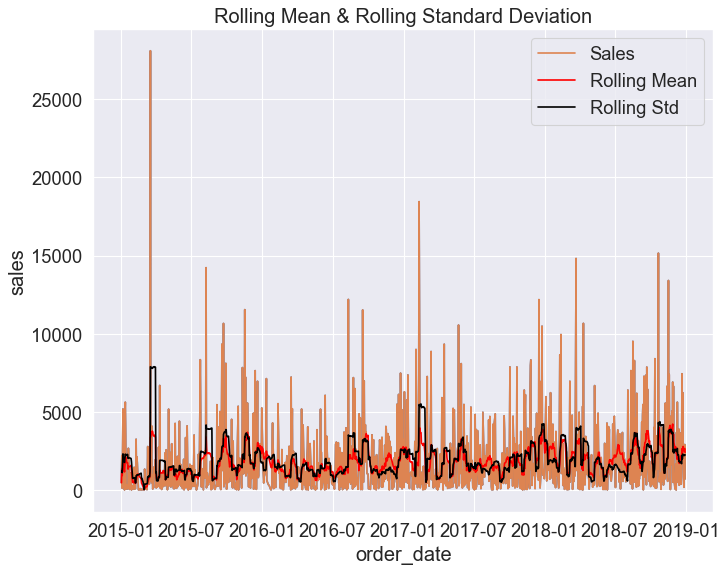

In [42]:
rolling_mean = sales_df['sales'].rolling(window = 12,min_periods = 1).mean()
rolling_std = sales_df['sales'].rolling(window = 12,min_periods = 1).std()

plt.figure(figsize=(10, 8), dpi=80)

# Change default palette
sns.lineplot(x=sales_df.index,y=sales_df.sales,data=sales_df)
sns.set_palette(['#62C370', '#FFD166', '#EF476F'])# Plot


plt.title('Rolling Mean & Rolling Standard Deviation of Sales')
plt.plot(sales_df.sales, label = "Sales")

plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [43]:
# Calculate the mean value of first 125 rows and afterwards
mean1, mean2 =sales_df.iloc[:125].sales.mean(), sales_df.iloc[125:].sales.mean()

# Calculate the variance value of first 125 rows and afterwards
var1, var2 = sales_df.iloc[:125].sales.var(), sales_df.iloc[125:].sales.var()

# Display mean and variance of two parts of the time series
print('mean1 = %f, mean2 = %f' % (mean1, mean2))
print('variance1 = %f, variance2 = %f' % (var1, var2))

mean1 = 1235.300384, mean2 = 1906.899760
variance1 = 7721807.459459, variance2 = 4952335.452573


Calcute the Augmented Dickey Fuller Test to determine the statiority of the data.</br></br>
We have calculated the 

In [44]:
result = adfuller(sales_df.sales)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -22.56841480504445
p-value: 0.0
Critical Values:
	1%: -3.4356863371792095
	5%: -2.8638964938393667
	10%: -2.568024631481501


Function for plotting auto-correlation and partial auto correlation 

In [45]:
# plotds is method to plot time series, ACF and PACF
def plotds(xt, nlag = 3, fig_size = (12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan = 2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax = ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags = 12, ax = ax_acf)
    plot_pacf(xt, lags = 12, ax = ax_pacf)
    plt.tight_layout()
    return None

Plot the data with 12 lags based on seasonal data</br</br>
An ADF test is conducted on the time series with a value of -22.562759</br>
This value along with a p-valiue of zero which is greater than the critical values means that we can reject the null hypothesis and determine that the data is stationary woi

ADF Statistic: -22.568415
p-value: 0.0
Critical Values:
	1%: -3.4356863371792095
	5%: -2.8638964938393667
	10%: -2.568024631481501


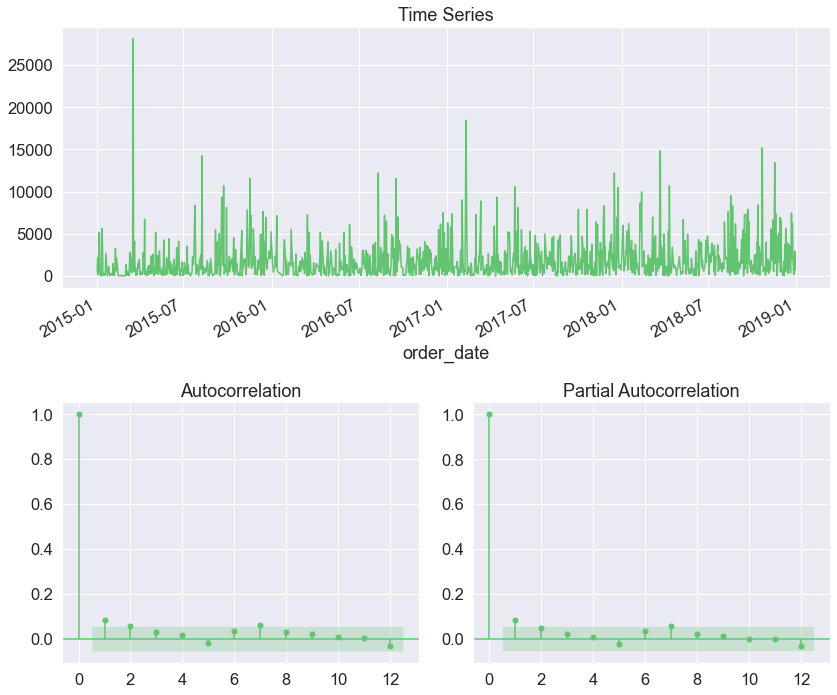

In [46]:
# plot the data with 12 lags
plotds(sales_df.sales, nlag = 12)

# Perform Dicky Fuller test
adf_result = adfuller(sales_df.sales)

# Display the outcomes
print('ADF Statistic: %f' % adf_result[0])
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

In [47]:
"""z=np.abs(stats.zscore(bg_numeric))
print(z)

remove_outlier = (z < 3).all(axis=1)"""

'z=np.abs(stats.zscore(bg_numeric))\nprint(z)\n\nremove_outlier = (z < 3).all(axis=1)'

# Train Test Splits

Split data four ways, and use test split as end of sorted data by setting shuffle to "False"

In [48]:
train_90,test_10= train_test_split(sales_df.sales,test_size=.1,shuffle=False)
train_80,test_20= train_test_split(sales_df.sales,test_size=.2,shuffle=False)
train_70,test_30= train_test_split(sales_df.sales,test_size=.3,shuffle=False)
train_60,test_40= train_test_split(sales_df.sales,test_size=.4,shuffle=False)

Change series training data to Dataframe variables

In [49]:
train_90 = pd.DataFrame(train_90)
train_80 = pd.DataFrame(train_80)
train_70 = pd.DataFrame(train_70)
train_60 = pd.DataFrame(train_60)

In [50]:
test_10

order_date
2018-08-19     512.4460
2018-08-20     692.9500
2018-08-21    8284.5340
2018-08-22     524.5400
2018-08-23    4590.3440
                ...    
2018-12-26     814.5940
2018-12-27     177.6360
2018-12-28    1657.3508
2018-12-29    2915.5340
2018-12-30     713.7900
Name: sales, Length: 123, dtype: float64

Use auto ARIMA to find smallest Akaikes Information Criteria number in order to deterimine Auto Correlation/Differencing/Moving Average parameters.

In [51]:
model_autoARIMA = auto_arima(sales_df.sales, start_p=1, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=0,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=22873.235, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=23138.794, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=22977.441, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=22771.717, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=22722.692, Time=0.14 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=1.80 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.73 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=22524.565, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=22523.152, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=22524.014, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=22525.097, Time=0.27 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=22525.373, Time=0.17 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=22526.563, Time=0.33 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 4.113 seconds
                     

Diagnostic results of auto arima function

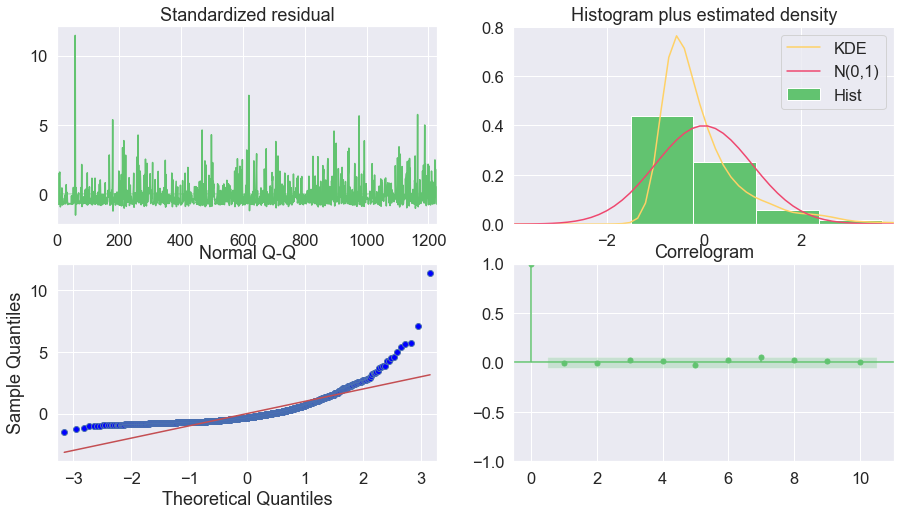

In [52]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

## ARMA Model Fit

In [53]:
model90 = ARIMA(train_90.sales, order=(2,0,0))
results90 = model90.fit();
results90.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  sales   No. Observations:                 1107
Model:                     ARMA(2, 0)   Log Likelihood              -10103.126
Method:                       css-mle   S.D. of innovations           2225.281
Date:                Sat, 06 Nov 2021   AIC                          20214.252
Time:                        17:45:57   BIC                          20234.290
Sample:                             0   HQIC                         20221.830
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1762.4665     76.200     23.130      0.000    1613.118    1911.815
ar.L1.sales     0.0915      0.030      3.040      0.002       0.032       0.150
ar.L2.sales     0.0309      0.030      1.023      0.306      -0.028       0.090
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.3961           +0.0000j            4.3961            0.0000
AR.2           -7.3525           +0.0000j            7.3525            0.5000
-----------------------------------------------------------------------------
"""

In [54]:
model80 = ARIMA(train_80.sales, order=(2,0,0))
results80 = model80.fit();
results80.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  sales   No. Observations:                  984
Model:                     ARMA(2, 0)   Log Likelihood               -8996.009
Method:                       css-mle   S.D. of innovations           2260.501
Date:                Sat, 06 Nov 2021   AIC                          18000.018
Time:                        17:45:57   BIC                          18019.585
Sample:                             0   HQIC                         18007.461
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1745.8824     82.079     21.271      0.000    1585.010    1906.755
ar.L1.sales     0.0895      0.032      2.811      0.005       0.027       0.152
ar.L2.sales     0.0327      0.032      1.026      0.305      -0.030       0.095
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            4.3297           +0.0000j            4.3297            0.0000
AR.2           -7.0707           +0.0000j            7.0707            0.5000
-----------------------------------------------------------------------------
"""

In [55]:
model70 = ARIMA(train_70.sales, order=(2,0,0))
results70 = model70.fit();
results70.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  sales   No. Observations:                  861
Model:                     ARMA(2, 0)   Log Likelihood               -7842.153
Method:                       css-mle   S.D. of innovations           2184.736
Date:                Sat, 06 Nov 2021   AIC                          15692.305
Time:                        17:45:57   BIC                          15711.338
Sample:                             0   HQIC                         15699.591
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1637.1392     80.797     20.262      0.000    1478.779    1795.499
ar.L1.sales     0.0603      0.034      1.768      0.077      -0.007       0.127
ar.L2.sales     0.0183      0.034      0.537      0.591      -0.049       0.085
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            5.9211           +0.0000j            5.9211            0.0000
AR.2           -9.2051           +0.0000j            9.2051            0.5000
-----------------------------------------------------------------------------
"""

In [56]:
model60 = ARIMA(train_60.sales, order=(2,0,0))
results60 = model60.fit();
results60.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  sales   No. Observations:                  738
Model:                     ARMA(2, 0)   Log Likelihood               -6748.679
Method:                       css-mle   S.D. of innovations           2265.632
Date:                Sat, 06 Nov 2021   AIC                          13505.359
Time:                        17:45:57   BIC                          13523.775
Sample:                             0   HQIC                         13512.460
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1645.9984     92.333     17.827      0.000    1465.030    1826.967
ar.L1.sales     0.0729      0.037      1.982      0.047       0.001       0.145
ar.L2.sales     0.0240      0.037      0.651      0.515      -0.048       0.096
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            5.1127           +0.0000j            5.1127            0.0000
AR.2           -8.1523           +0.0000j            8.1523            0.5000
-----------------------------------------------------------------------------
"""

Create Accuracy function to calculate accuracy of predictions

In [57]:
def accuracy(timeseries):
    mse = mean_squared_error(timeseries, predictions)
    print('MSE: '+str(mse))

    mae = mean_absolute_error (timeseries,predictions)
    print('MAE: '+str(mae))
    rmse = math.sqrt(mean_squared_error(timeseries,predictions))
    print('RMSE: '+str(rmse))
    mape = np.mean(np.abs(predictions -  timeseries)/np.abs(timeseries))
    print('MAPE: '+str(mape))

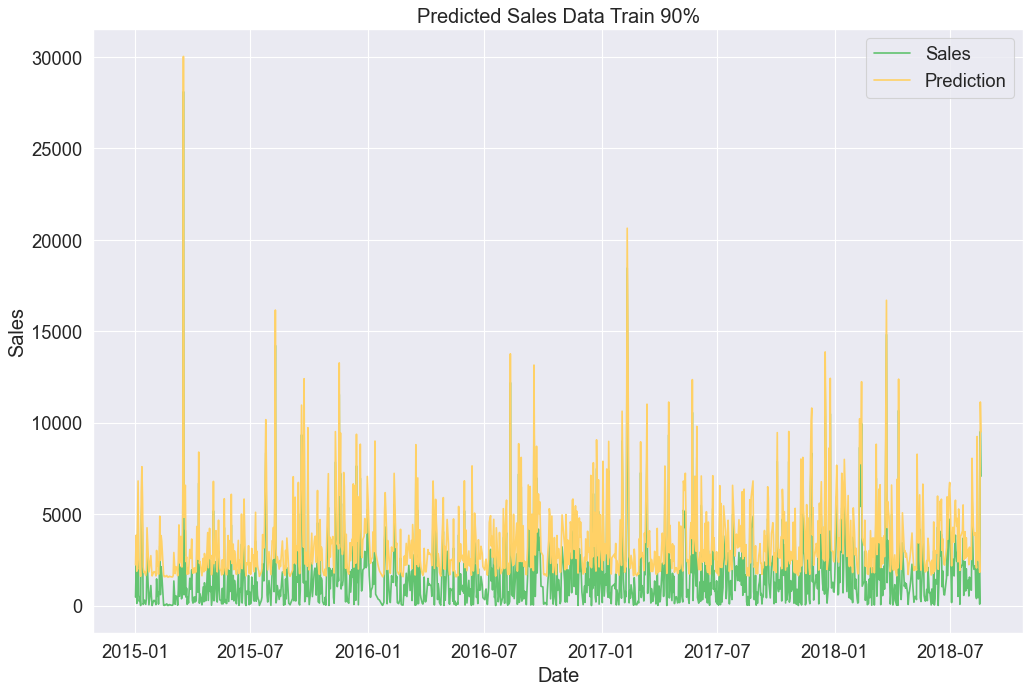

In [58]:
predictions_diff = pd.Series(results90.fittedvalues, copy=True)

predictions = pd.Series(train_90.sales, index=train_90.index)

predictions = predictions.add(predictions_diff, fill_value=0)

#predictions = np.exp(predictions)
figure(figsize=(15, 10), dpi=80);
plt.plot(train_90.sales, label='Sales') 
plt.plot(predictions,label='Prediction')
plt.title('Predicted Sales Data Train 90%')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend();

Accuracy of 90% training data

In [59]:
accuracy(train_90.sales)

MSE: 3152218.238931234
MAE: 1761.6585349285012
RMSE: 1775.4487429749229
MAPE: 11.049400391649383


In [61]:
cv = model_selection.SlidingWindowForecastCV(window_size=100, step=24, h=1)

model1_cv_scores = model_selection.cross_val_score(
    model60, train60.sales, scoring='smape', cv=cv, verbose=2)

NameError: name 'model_selection' is not defined

10 Day forecast of Training data at 90%

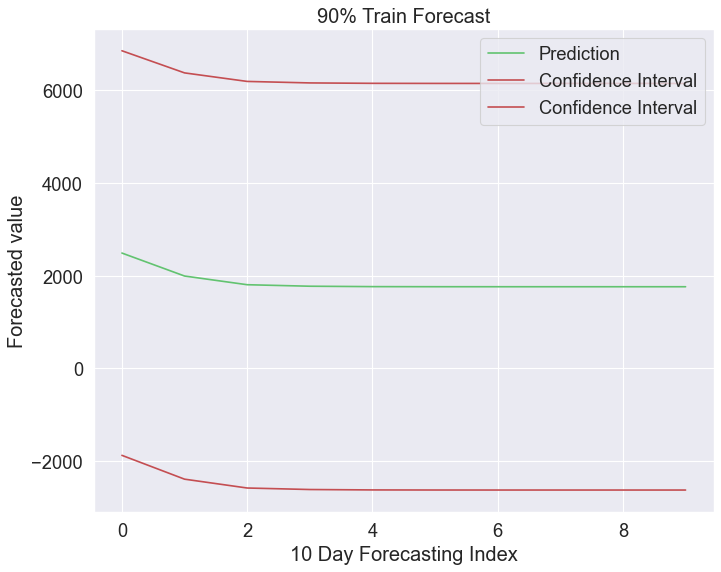

In [62]:
f, err, ci = results90.forecast(10)
figure(figsize=(10, 8), dpi=80);
plt.plot(f,label = 'Prediction');
plt.plot(ci,label='Confidence Interval',color='r');
plt.xlabel('10 Day Forecasting Index');
plt.ylabel('Forecasted value');
plt.title('90% Train Forecast');
plt.legend();

# The forecasting estimates and confidence interval obtained using the preceding script is shown in Figure


In [63]:
test_10

order_date
2018-08-19     512.4460
2018-08-20     692.9500
2018-08-21    8284.5340
2018-08-22     524.5400
2018-08-23    4590.3440
                ...    
2018-12-26     814.5940
2018-12-27     177.6360
2018-12-28    1657.3508
2018-12-29    2915.5340
2018-12-30     713.7900
Name: sales, Length: 123, dtype: float64

ARMA Prediction of Training Data at 80%

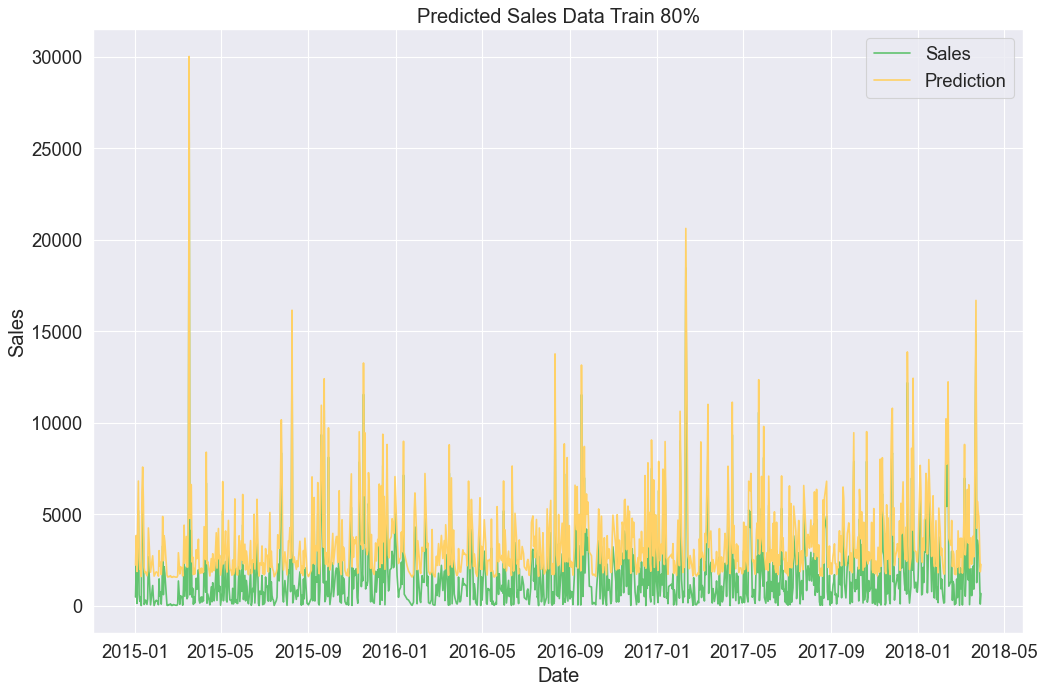

In [64]:
predictions_diff = pd.Series(results80.fittedvalues, copy=True)

predictions = pd.Series(train_80.sales, index=train_80.index)

predictions = predictions.add(predictions_diff, fill_value=0)

#predictions = np.exp(predictions)
figure(figsize=(15, 10), dpi=80);
plt.plot(train_80.sales, label='Sales') 
plt.plot(predictions,label='Prediction')
plt.title('Predicted Sales Data Train 80%')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend();

Prediction accuracy of training data at 80%

In [65]:
accuracy(train_80.sales)

MSE: 3098395.097964146
MAE: 1746.0690487830757
RMSE: 1760.225865610475
MAPE: 11.476315552715214


10 day forecast of 80% training data

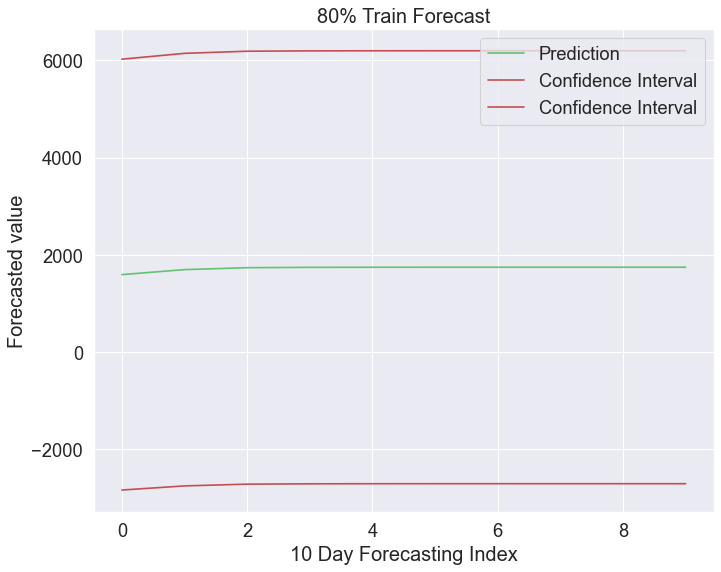

In [66]:
f, err, ci = results80.forecast(10)
figure(figsize=(10, 8), dpi=80);
plt.plot(f,label = 'Prediction');
plt.plot(ci,label='Confidence Interval',color='r');
plt.xlabel('10 Day Forecasting Index');
plt.ylabel('Forecasted value');
plt.title('80% Train Forecast');
plt.legend();

# The forecasting estimates and confidence interval obtained using the preceding script is shown in Figure


Actual test data

In [67]:
test_20

order_date
2018-03-31    4981.0108
2018-04-02      32.6700
2018-04-03     228.8220
2018-04-04     808.4700
2018-04-05    1146.2450
                ...    
2018-12-26     814.5940
2018-12-27     177.6360
2018-12-28    1657.3508
2018-12-29    2915.5340
2018-12-30     713.7900
Name: sales, Length: 246, dtype: float64

ARMA Prediction of 70% of Training data

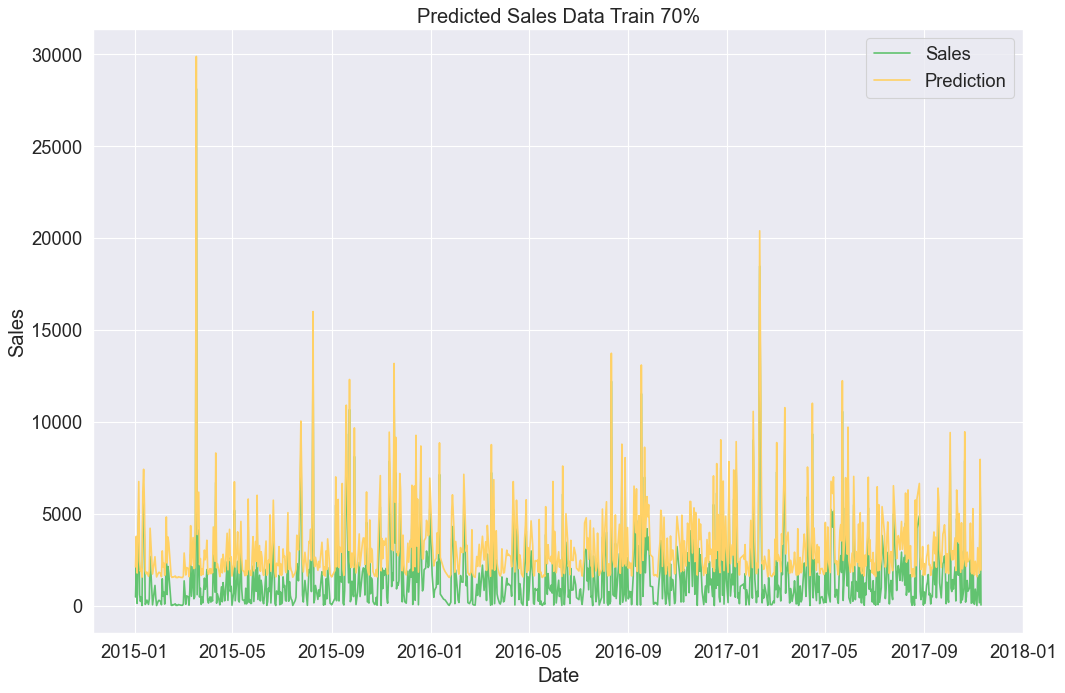

In [68]:
predictions_diff = pd.Series(results70.fittedvalues, copy=True)

predictions = pd.Series(train_70.sales, index=train_70.index)

predictions = predictions.add(predictions_diff, fill_value=0)

#predictions = np.exp(predictions)
figure(figsize=(15, 10), dpi=80);
plt.plot(train_70.sales, label='Sales') 
plt.plot(predictions,label='Prediction')
plt.title('Predicted Sales Data Train 70%')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend();

Accuracy of ARMA model at 70% Training data

In [69]:
accuracy(train_70.sales)

MSE: 2700029.951514135
MAE: 1637.1825416987301
RMSE: 1643.1767864457358
MAPE: 11.878017763359516


10 day forecast of 70% Training data

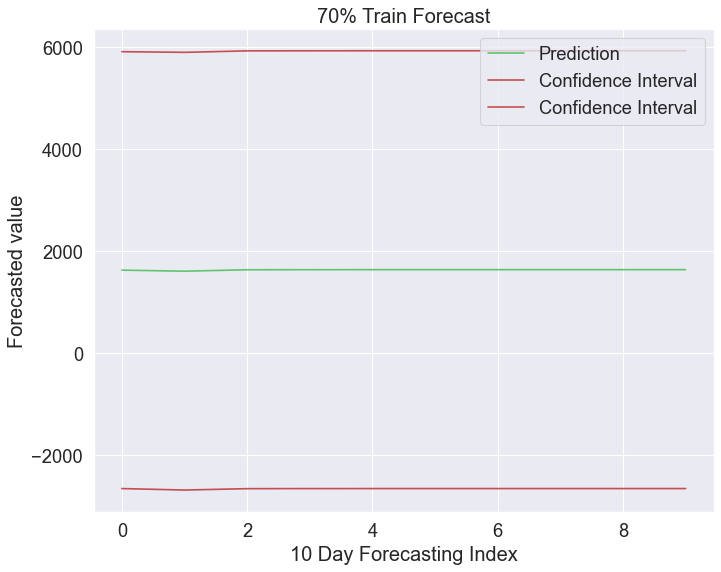

In [70]:
f, err, ci = results70.forecast(10)
figure(figsize=(10, 8), dpi=80);
plt.plot(f,label = 'Prediction');
plt.plot(ci,label='Confidence Interval',color='r');
plt.xlabel('10 Day Forecasting Index');
plt.ylabel('Forecasted value');
plt.title('70% Train Forecast');
plt.legend();

# The forecasting estimates and confidence interval obtained using the preceding script is shown in Figure


Actual test data at 30%

In [71]:
test_30

order_date
2017-11-11    4944.2960
2017-11-12    6102.2500
2017-11-13    2945.1380
2017-11-14    2774.0620
2017-11-15    2145.7180
                ...    
2018-12-26     814.5940
2018-12-27     177.6360
2018-12-28    1657.3508
2018-12-29    2915.5340
2018-12-30     713.7900
Name: sales, Length: 369, dtype: float64

ARMA Prediction of 60% of Training data

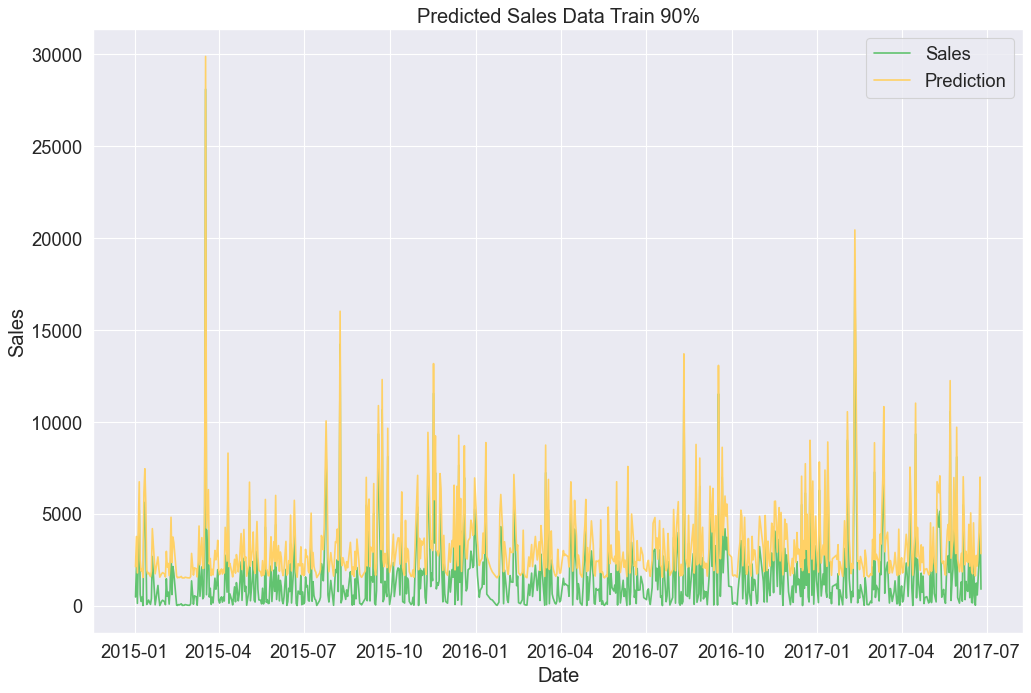

In [72]:
predictions_diff = pd.Series(results60.fittedvalues, copy=True)

predictions = pd.Series(train_60.sales, index=train_60.index)

predictions = predictions.add(predictions_diff, fill_value=0)

#predictions = np.exp(predictions)
figure(figsize=(15, 10), dpi=80);
plt.plot(train_60.sales, label='Sales') 
plt.plot(predictions,label='Prediction')
plt.title('Predicted Sales Data Train 90%')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend();

Accuracy of ARMA model at training data 60%

In [73]:
accuracy(train_60.sales)

MSE: 2741025.0792485634
MAE: 1645.9752448960787
RMSE: 1655.6041432808036
MAPE: 12.42265393166196


Forecast ARMA results

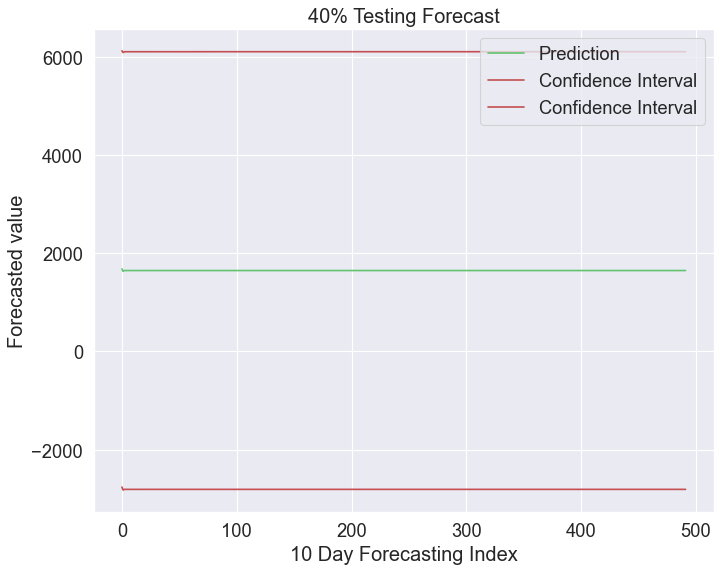

In [74]:
f, err, ci = results60.forecast(492)
figure(figsize=(10, 8), dpi=80);
plt.plot(f,label = 'Prediction');
plt.plot(ci,label='Confidence Interval',color='r');
plt.xlabel('10 Day Forecasting Index');
plt.ylabel('Forecasted value');
plt.title('40% Testing Forecast');
plt.legend();

# The forecasting estimates and confidence interval obtained using the preceding script is shown in Figure


Actual 40% Test data 

In [75]:
test_40

order_date
2017-06-26    1919.6000
2017-06-27     778.7060
2017-06-28     877.1560
2017-06-29     191.8800
2017-06-30    1352.9500
                ...    
2018-12-26     814.5940
2018-12-27     177.6360
2018-12-28    1657.3508
2018-12-29    2915.5340
2018-12-30     713.7900
Name: sales, Length: 492, dtype: float64

## SARMA Model

Import SARIMAX library from statsmodels

In [76]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

Create a new Dataframe variable, resample and do a linear interpolation for Seasonal Decomposition

In [77]:
sales_df_sarima = pd.DataFrame(sales_df['sales'])
sales_df_sarima =  pd.DataFrame(sales_df_sarima['sales'].resample('D').mean())
sales_df_sarima = sales_df_sarima.interpolate(method='linear')
sales_df_sarima

sales
order_date           
2015-01-02   468.9000
2015-01-03  2203.1510
2015-01-04   119.8880
2015-01-05  2654.2040
2015-01-06  5188.5200
...               ...
2018-12-26   814.5940
2018-12-27   177.6360
2018-12-28  1657.3508
2018-12-29  2915.5340
2018-12-30   713.7900

[1459 rows x 1 columns]

Perform Seasonal Decomposition to determine seasonality/trends

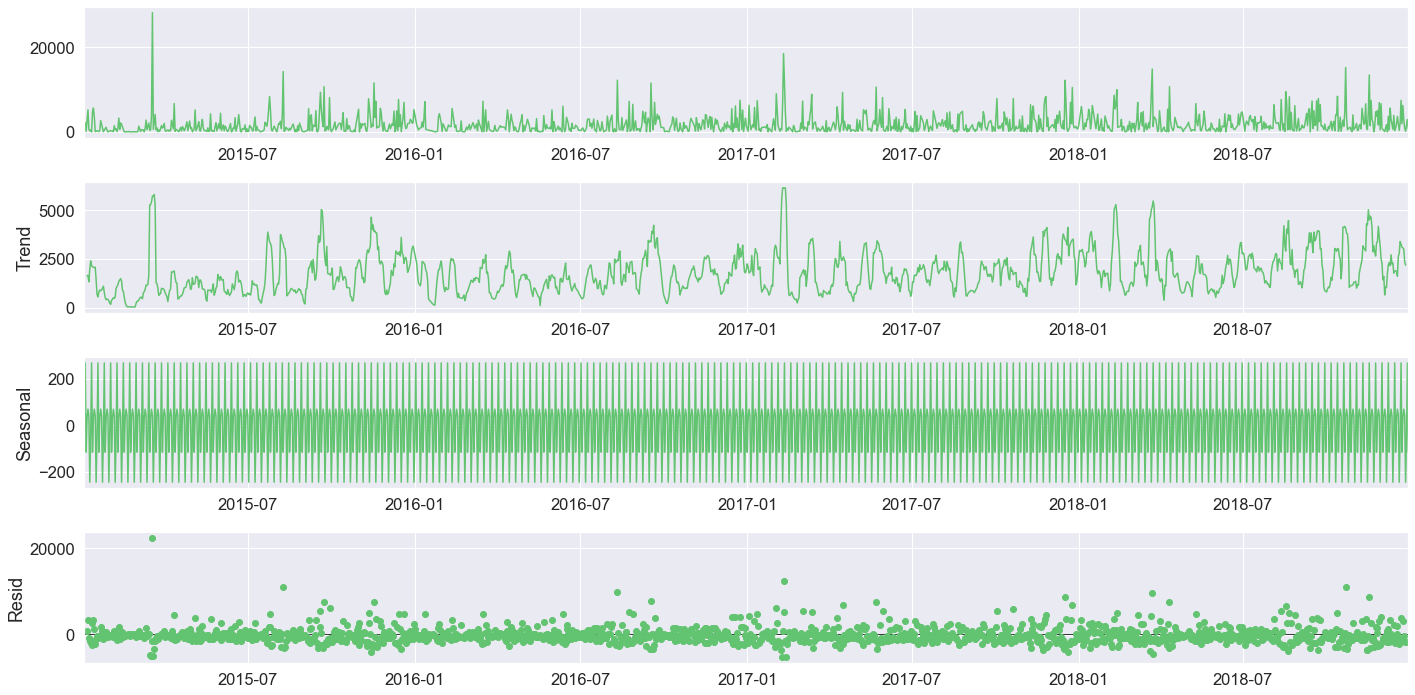

In [78]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(
    sales_df_sarima, model='additive'
)  #function used to decompose Time Series Data into Trend and Seasonality

fig = decomposition.plot()
plt.show()

</br>

Fit SARMA model to split data

In [79]:
mod = sm.tsa.statespace.SARIMAX(train_90.sales,
                                order=(2, 0,0 ),
                                seasonal_order=(2, 0, 0, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False) #model defintion
results90 = mod.fit() #model fitting
print(results90.summary().tables[1]) # displaying the result 

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2631      0.021     12.407      0.000       0.222       0.305
ar.L2          0.2030      0.031      6.544      0.000       0.142       0.264
ar.S.L12       0.1105      0.033      3.384      0.001       0.047       0.175
ar.S.L24       0.1223      0.031      3.951      0.000       0.062       0.183
sigma2      6.077e+06   9.12e+04     66.619      0.000     5.9e+06    6.26e+06


In [80]:
mod = sm.tsa.statespace.SARIMAX(train_80.sales,
                                order=(2, 0, 0),
                                seasonal_order=(2, 0, 0, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False) #model defintion
results80 = mod.fit() #model fitting
print(results80.summary().tables[1]) # displaying the result 

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2529      0.023     10.939      0.000       0.208       0.298
ar.L2          0.1898      0.035      5.432      0.000       0.121       0.258
ar.S.L12       0.1047      0.036      2.927      0.003       0.035       0.175
ar.S.L24       0.1426      0.032      4.505      0.000       0.081       0.205
sigma2      6.246e+06   9.88e+04     63.238      0.000    6.05e+06    6.44e+06


In [81]:
mod = sm.tsa.statespace.SARIMAX(train_70.sales,
                                order=(2, 0, 0),
                                seasonal_order=(2, 0, 0, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False) #model defintion
results70 = mod.fit() #model fitting
print(results70.summary().tables[1]) # displaying the result 

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2180      0.026      8.284      0.000       0.166       0.270
ar.L2          0.1756      0.040      4.342      0.000       0.096       0.255
ar.S.L12       0.1161      0.035      3.279      0.001       0.047       0.186
ar.S.L24       0.1659      0.031      5.427      0.000       0.106       0.226
sigma2      5.891e+06   9.35e+04     62.985      0.000    5.71e+06    6.07e+06


In [82]:
mod = sm.tsa.statespace.SARIMAX(train_60.sales,
                                order=(2, 0, 0),
                                seasonal_order=(2, 0, 0, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False) #model defintion
results60 = mod.fit() #model fitting
print(results60.summary().tables[1]) # displaying the result 

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2294      0.027      8.362      0.000       0.176       0.283
ar.L2          0.1799      0.043      4.157      0.000       0.095       0.265
ar.S.L12       0.0931      0.041      2.244      0.025       0.012       0.174
ar.S.L24       0.1557      0.034      4.603      0.000       0.089       0.222
sigma2      6.264e+06   1.06e+05     58.851      0.000    6.06e+06    6.47e+06


Plot Diagnostics of model using SARMA p,d,q (2,0,0),(2,0,0,12)

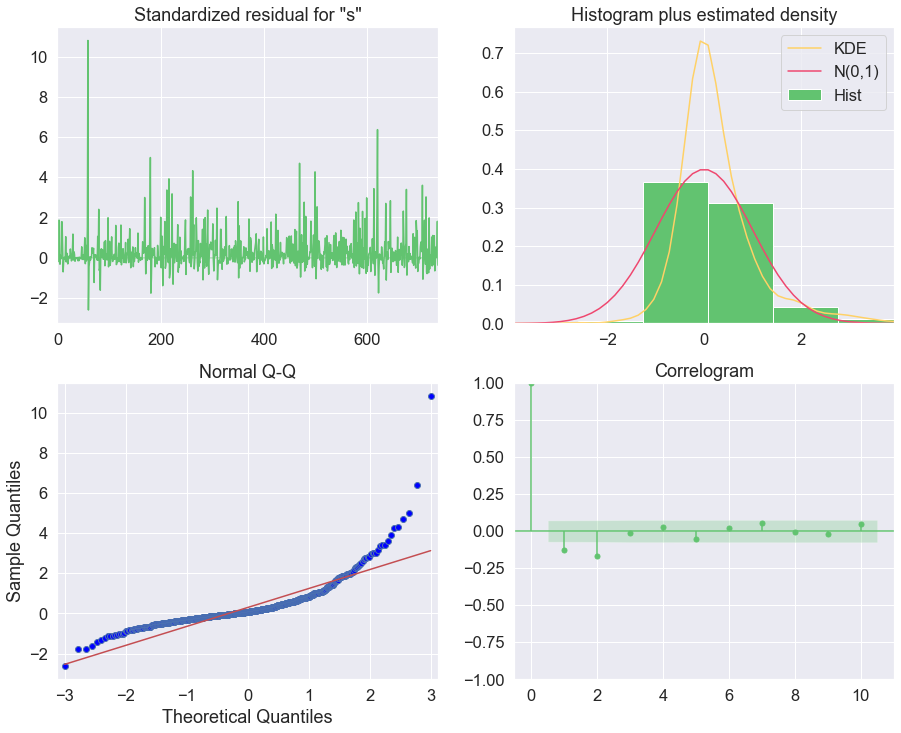

In [83]:
results60.plot_diagnostics(figsize=(15, 12)) 
plt.show()


SARMA Preedictions for 90% Training Data 

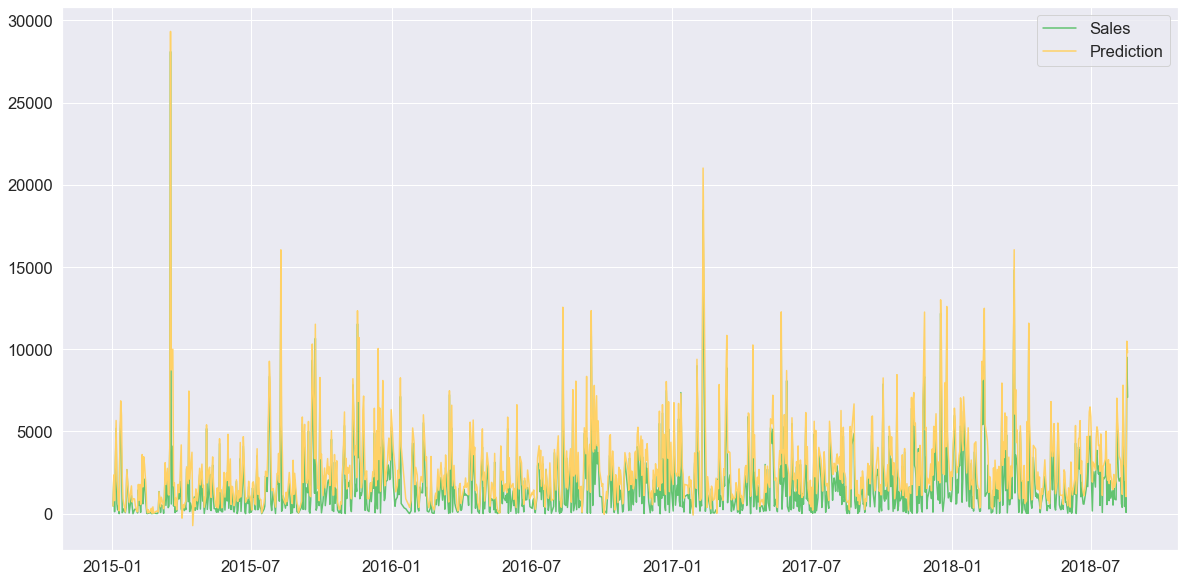

In [84]:
predictions_SARIMA_diff = pd.Series(results90.fittedvalues, copy=True)
predictions_SARIMA_diff_cumsum = predictions_SARIMA_diff.cumsum()
predictions_SARIMA = pd.Series(train_90.sales, index=train_90.index)
predictions = predictions_SARIMA.add(predictions_SARIMA_diff, fill_value=0)

plt.plot(train_90.sales,label='Sales')
plt.plot(predictions,label='Prediction')

plt.legend()

SARMA 90% Training Accuracy

In [85]:
accuracy(train_90.sales)

MSE: 1801152.3588656734
MAE: 1036.6322962569425
RMSE: 1342.070176580075
MAPE: 5.269528102870697


In [86]:
results90.forecast(10)

1107    4041.702399
1108    2570.751263
1109    1791.738598
1110     983.989063
1111     661.135784
1112    1302.792149
1113     528.444004
1114     343.064621
1115     387.057768
1116     149.496970
Name: predicted_mean, dtype: float64

In [87]:
test_10

order_date
2018-08-19     512.4460
2018-08-20     692.9500
2018-08-21    8284.5340
2018-08-22     524.5400
2018-08-23    4590.3440
                ...    
2018-12-26     814.5940
2018-12-27     177.6360
2018-12-28    1657.3508
2018-12-29    2915.5340
2018-12-30     713.7900
Name: sales, Length: 123, dtype: float64

SARMA Preedictions for 80% Training Data 

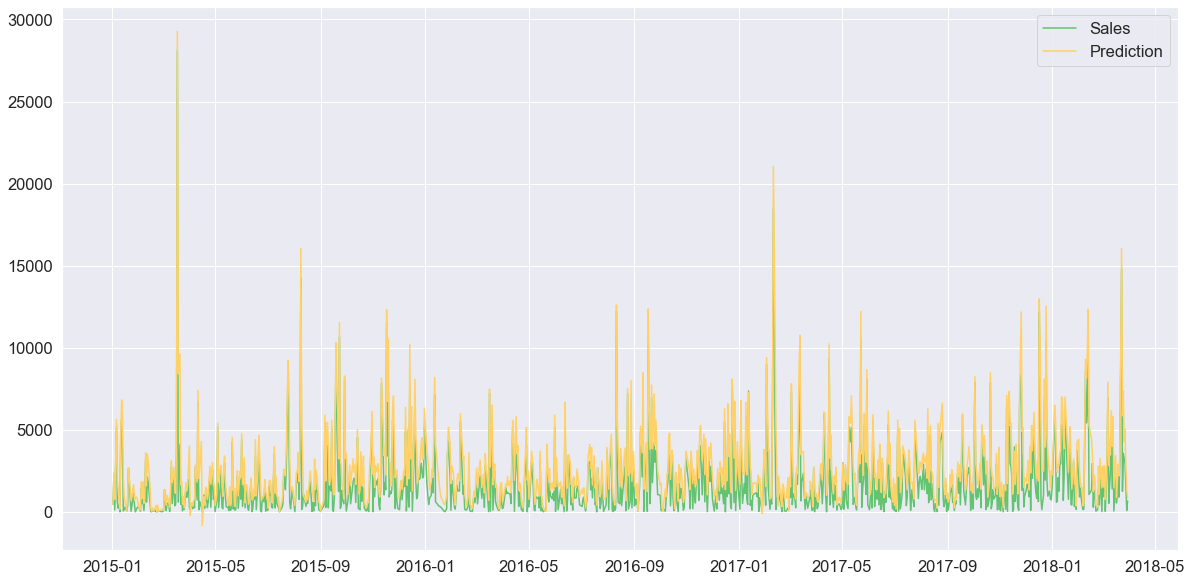

In [88]:
predictions_SARIMA_diff = pd.Series(results80.fittedvalues, copy=True)
predictions_SARIMA_diff_cumsum = predictions_SARIMA_diff.cumsum()
predictions_SARIMA = pd.Series(train_80.sales, index=train_80.index)
predictions = predictions_SARIMA.add(predictions_SARIMA_diff, fill_value=0)

plt.plot(train_80.sales,label='Sales')
plt.plot(predictions,label='Prediction')

plt.legend()

SARMA model accuracy for 80% training data 

In [89]:
accuracy(train_80.sales)

MSE: 1743711.6031885066
MAE: 1012.1434737095802
RMSE: 1320.4967259287341
MAPE: 5.281791310554405


SARMA model predictions 70% Training data

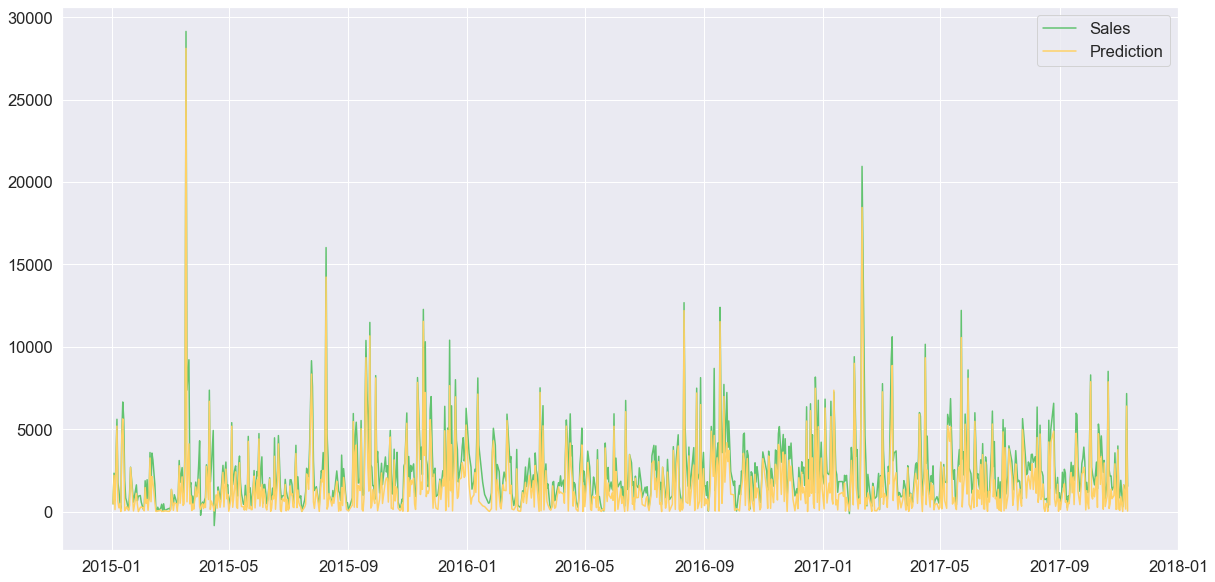

In [90]:
predictions_SARIMA_diff = pd.Series(results70.fittedvalues, copy=True)
predictions_SARIMA_diff_cumsum = predictions_SARIMA_diff.cumsum()
predictions_SARIMA = pd.Series(train_70.sales, index=train_70.index)
predictions = predictions_SARIMA.add(predictions_SARIMA_diff, fill_value=0)

plt.plot(predictions,label='Sales')
plt.plot(train_70.sales,label='Prediction')
plt.legend()

SARMA model accuracy for 70% training data 

In [91]:
accuracy(train_70.sales)

MSE: 1448614.0582677484
MAE: 924.1129805929373
RMSE: 1203.583839318121
MAPE: 5.4815994166021005


SARMA model predictions 60% Training data

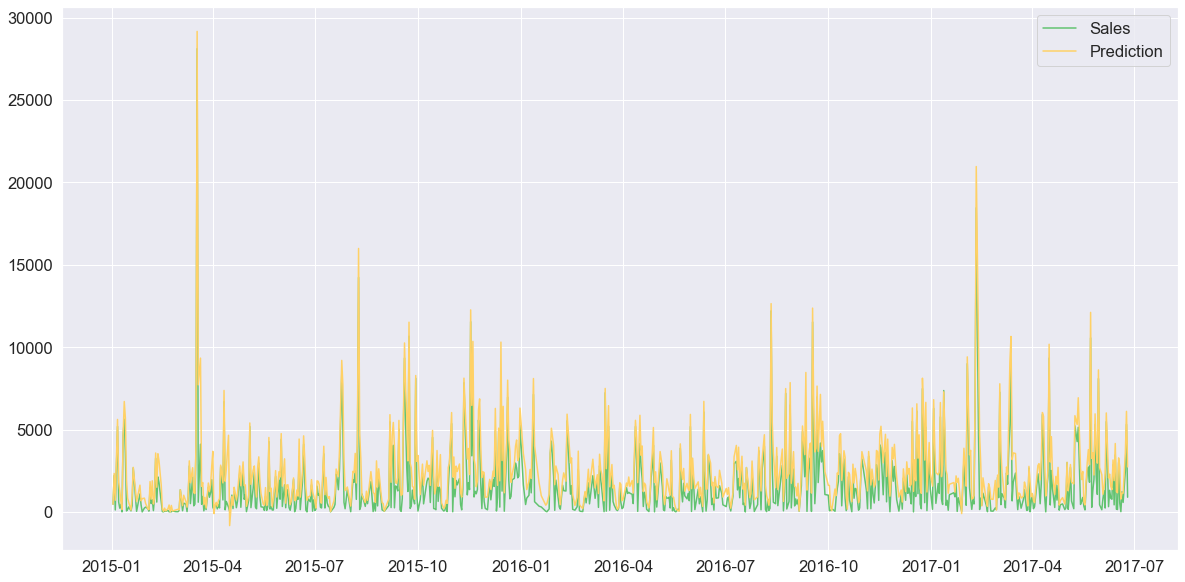

In [92]:
predictions_SARIMA_diff = pd.Series(results60.fittedvalues, copy=True)
predictions_SARIMA_diff_cumsum = predictions_SARIMA_diff.cumsum()
predictions_SARIMA = pd.Series(train_60.sales, index=train_60.index)
predictions = predictions_SARIMA.add(predictions_SARIMA_diff, fill_value=0)

plt.plot(train_60.sales,label='Sales')
plt.plot(predictions,label='Prediction')

plt.legend()

SARMA model accuracy for 70% training data 

In [93]:
accuracy(train_60.sales)

MSE: 1475927.438337681
MAE: 914.0438195889038
RMSE: 1214.877540469689
MAPE: 5.639503632916222


## Exponential Smoothing

Import Holt Winters Exponential Smoothing libraries

In [94]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing

Create new Dataframe variable for seasonal decomposition

In [95]:
sales_df_seasonal = pd.DataFrame(sales_df['sales'])
sales_df_seasonal =  pd.DataFrame(sales_df_seasonal['sales'].resample('D').mean())
sales_df_seasonal = sales_df_seasonal.interpolate(method='linear')

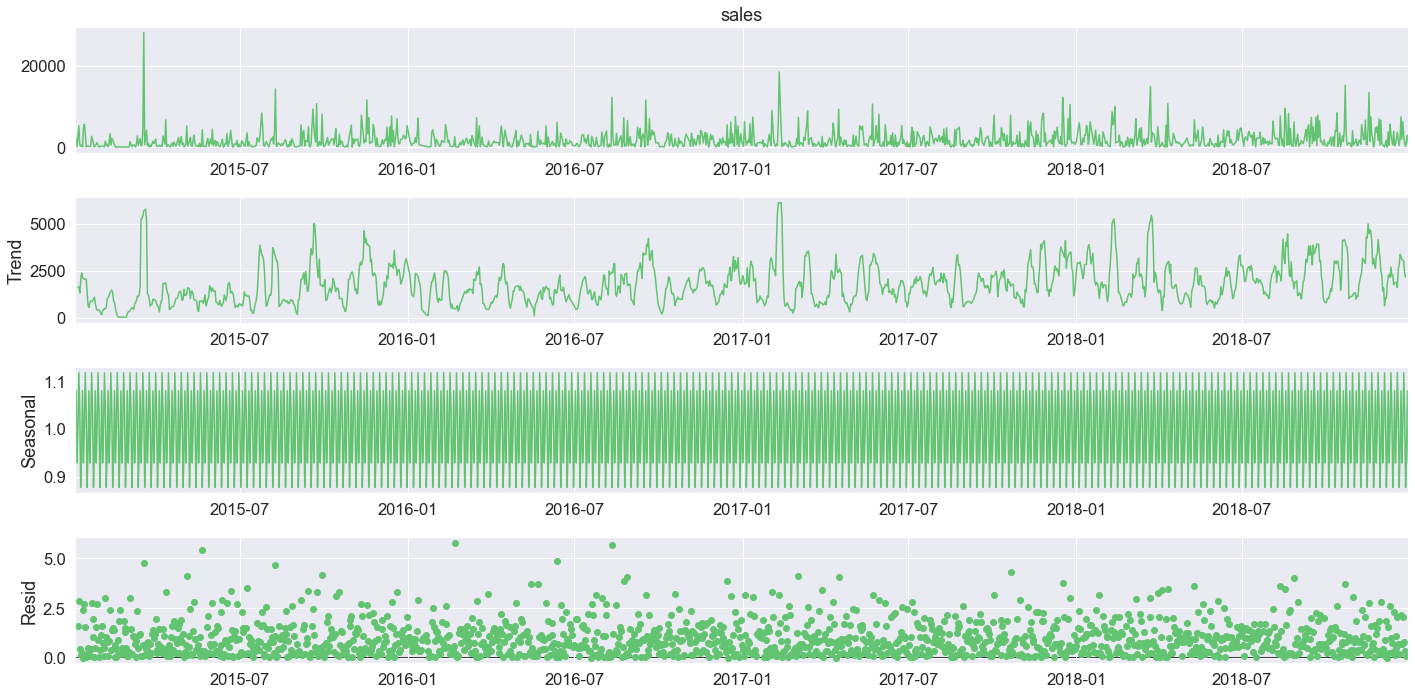

In [96]:
decompose_result = seasonal_decompose(sales_df_seasonal['sales'],model='multiplicative')
decompose_result.plot();

In [97]:
# Set the value of Alpha and define m (Time Period)
m = 12
alpha = 1/(2*m)

Fit Simple Exponential Smoothing plot 

In [111]:
sales_df['HWES1'] = ExponentialSmoothing(sales_df['sales'],trend='add').fit().fittedvalues

In [112]:
model_fitSES = SimpleExpSmoothing(sales_df['sales']).fit(smoothing_level=alpha,optimized=False,use_brute=True)

Plot Simple Exponential Smoothing Predictions 

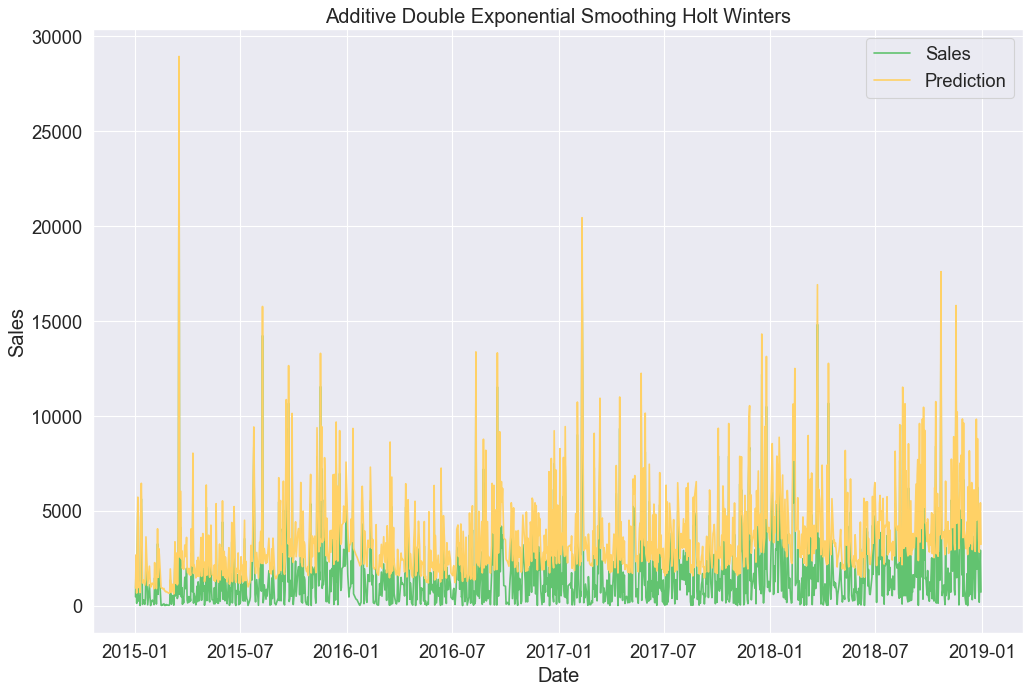

In [113]:
predictions_diff = pd.Series(model_fitSES.fittedvalues, copy=True)

predictions = pd.Series(sales_df['sales'], index=sales_df.index)

predictions = predictions.add(predictions_diff, fill_value=0)
 
#predictions = np.exp(predictions)
figure(figsize=(15, 10), dpi=80);
plt.plot(sales_df.sales, label='Sales') 
plt.plot(predictions,label='Prediction')
plt.title('Additive Double Exponential Smoothing Holt Winters')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend();

Accuracy of Holt Winters Exponential Smoothing model

In [114]:
accuracy(sales_df.HWES1)

MSE: 9210317.657372573
MAE: 2029.931378796289
RMSE: 3034.850516478954
MAPE: 1.8314443678715837


In [105]:
sales_df['HWES2_ADD'] = ExponentialSmoothing(sales_df['sales'],trend='add').fit().fittedvalues

In [101]:
model_fit = ExponentialSmoothing(sales_df['sales'],trend='add').fit()

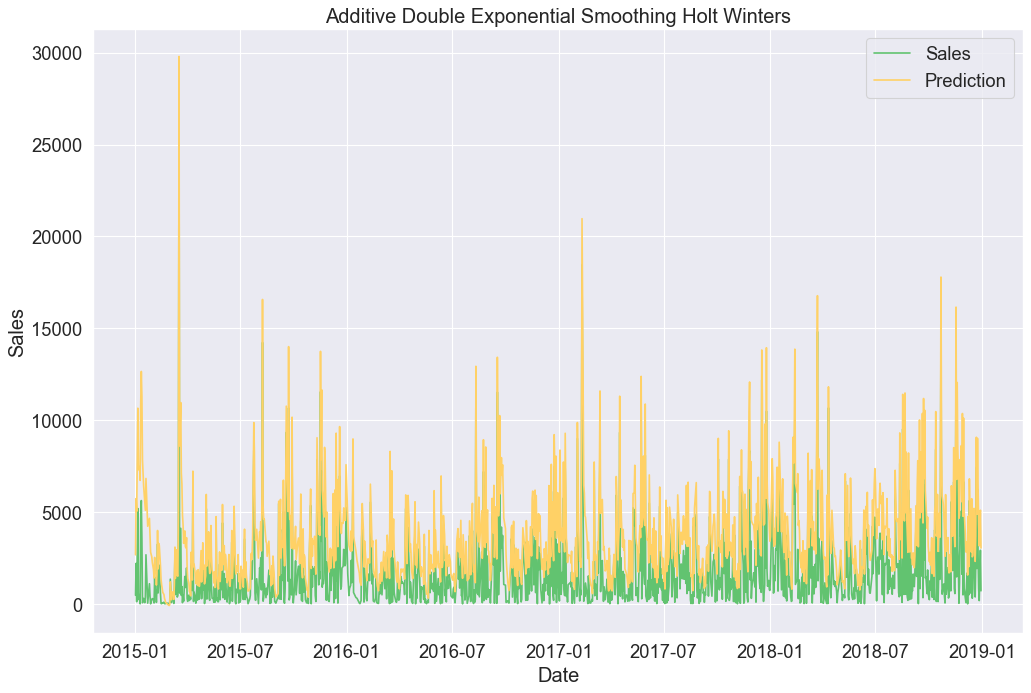

In [102]:
predictions_diff = pd.Series(model_fit.fittedvalues, copy=True)

predictions = pd.Series(sales_df['sales'], index=sales_df.index)

predictions = predictions.add(predictions_diff, fill_value=0)

#predictions = np.exp(predictions)
figure(figsize=(15, 10), dpi=80);
plt.plot(sales_df.sales, label='Sales') 
plt.plot(predictions,label='Prediction')
plt.title('Additive Double Exponential Smoothing Holt Winters')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend();

In [106]:
accuracy(sales_df.HWES2_ADD)

MSE: 8645287.02577301
MAE: 1838.6477908130084
RMSE: 2940.28689514697
MAPE: 1.3860695226989683


In [107]:
sales_df['HWES3_ADD'] = ExponentialSmoothing(sales_df['sales'],trend='add').fit().fittedvalues

In [108]:
model_fit = ExponentialSmoothing(sales_df['sales'],trend='add',seasonal='add',seasonal_periods=12).fit()

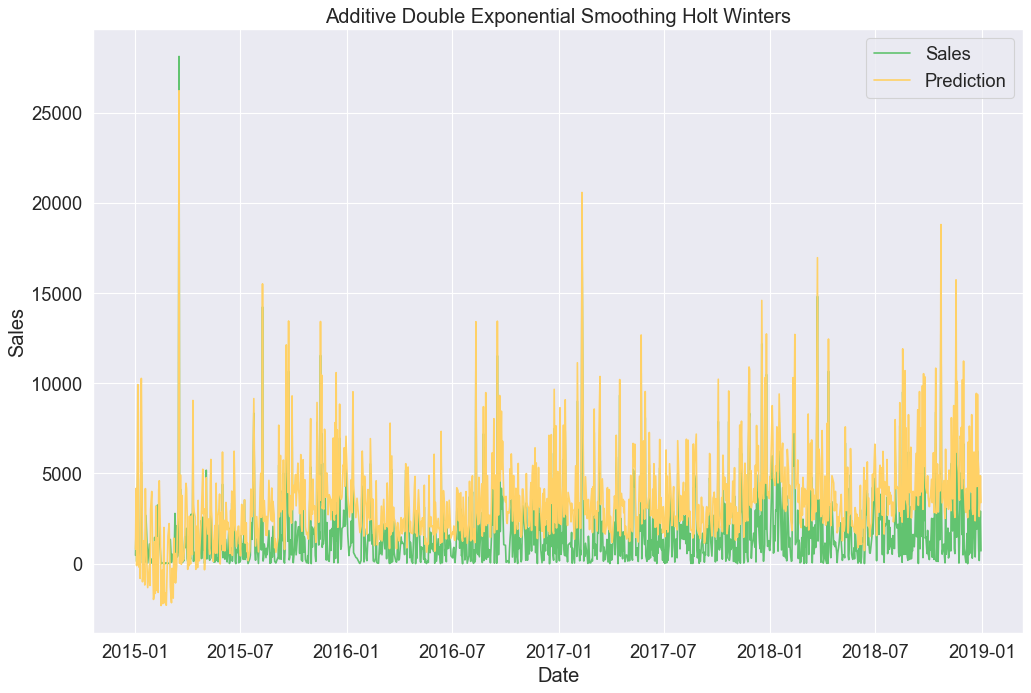

In [109]:
predictions_diff = pd.Series(model_fit.fittedvalues, copy=True)

predictions = pd.Series(sales_df['sales'], index=sales_df.index)

predictions = predictions.add(predictions_diff, fill_value=0)

#predictions = np.exp(predictions)
figure(figsize=(15, 10), dpi=80);
plt.plot(sales_df.sales, label='Sales') 
plt.plot(predictions,label='Prediction')
plt.title('Additive Double Exponential Smoothing Holt Winters')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend();

In [110]:
accuracy(sales_df.HWES3_ADD)

MSE: 9862010.21430277
MAE: 2150.6488980150802
RMSE: 3140.3837686344596
MAPE: 2.0390151041711175
